In [1]:
from importlib import reload
from earthtext.io import io
from earthtext.datamodules import chipmultilabel
from progressbar import progressbar as pbar
from rlxutils import subplots
import numpy as np
import matplotlib.pyplot as plt
reload(chipmultilabel)
reload(io)

<module 'earthtext.io.io' from '/home/ubuntu/earth-text/src/earthtext/io/io.py'>

In [2]:
mfile = '/opt/data/california-worldcover-chips-osm-multilabels.parquet'
chips_folder = "/opt/data/clay-california-worldcover-rgbnir-vvvh-chips/chips"

In [45]:
cm = chipmultilabel.ChipMultilabelModule(
                            metadata_file = mfile,
                            chips_folder = chips_folder, 
                            get_strlabels = True,
                            batch_size = 4,
                            min_ohe_count = 1
     )



2024-04-02 15:44:28.296 | INFO     | earthtext.datamodules.components.chipmultilabel:__init__:41 - checking chip files for train split
100% (58690 of 58690) |##################| Elapsed Time: 0:00:03 Time:  0:00:030000
2024-04-02 15:44:31.368 | INFO     | earthtext.datamodules.components.chipmultilabel:__init__:44 - read train split with 58599 chip files (out of 58690)
2024-04-02 15:44:31.837 | INFO     | earthtext.datamodules.components.chipmultilabel:__init__:41 - checking chip files for val split
100% (11841 of 11841) |##################| Elapsed Time: 0:00:00 Time:  0:00:000000
2024-04-02 15:44:32.474 | INFO     | earthtext.datamodules.components.chipmultilabel:__init__:44 - read val split with 11822 chip files (out of 11841)
2024-04-02 15:44:32.916 | INFO     | earthtext.datamodules.components.chipmultilabel:__init__:41 - checking chip files for test split
100% (13078 of 13078) |##################| Elapsed Time: 0:00:00 Time:  0:00:000000
2024-04-02 15:44:33.576 | INFO     | earth

In [46]:
tr = cm.train_dataloader()

{'chip': 4, 'multilabel': 4, 'str_multilabel': 4}


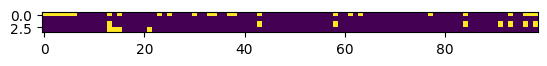

In [121]:
for batch in iter(tr):
    break
print ({k:len(v) for k,v in batch.items()})
plt.imshow(batch['multilabel'])


 batch img 0:   amenity=* amenity=parking building=* building=apartments building=house building=industrial building=residential building=school highway=* highway=residential landuse=* landuse=grass landuse=industrial landuse=meadow landuse=residential leisure=* leisure=garden leisure=park leisure=pitch natural=* natural=scrub natural=water parking=* parking=surface sport=* sport=baseball surface=* surface=asphalt surface=paved surface=sand water=* water=pond water=river waterway=* waterway=river waterway=stream

 batch img 1:   highway=* highway=residential landuse=* landuse=commercial

 batch img 2:   highway=* highway=residential natural=* natural=water water=* water=stream waterway=* waterway=stream

 batch img 3:   highway=* highway=residential highway=track landuse=* landuse=farmyard landuse=residential


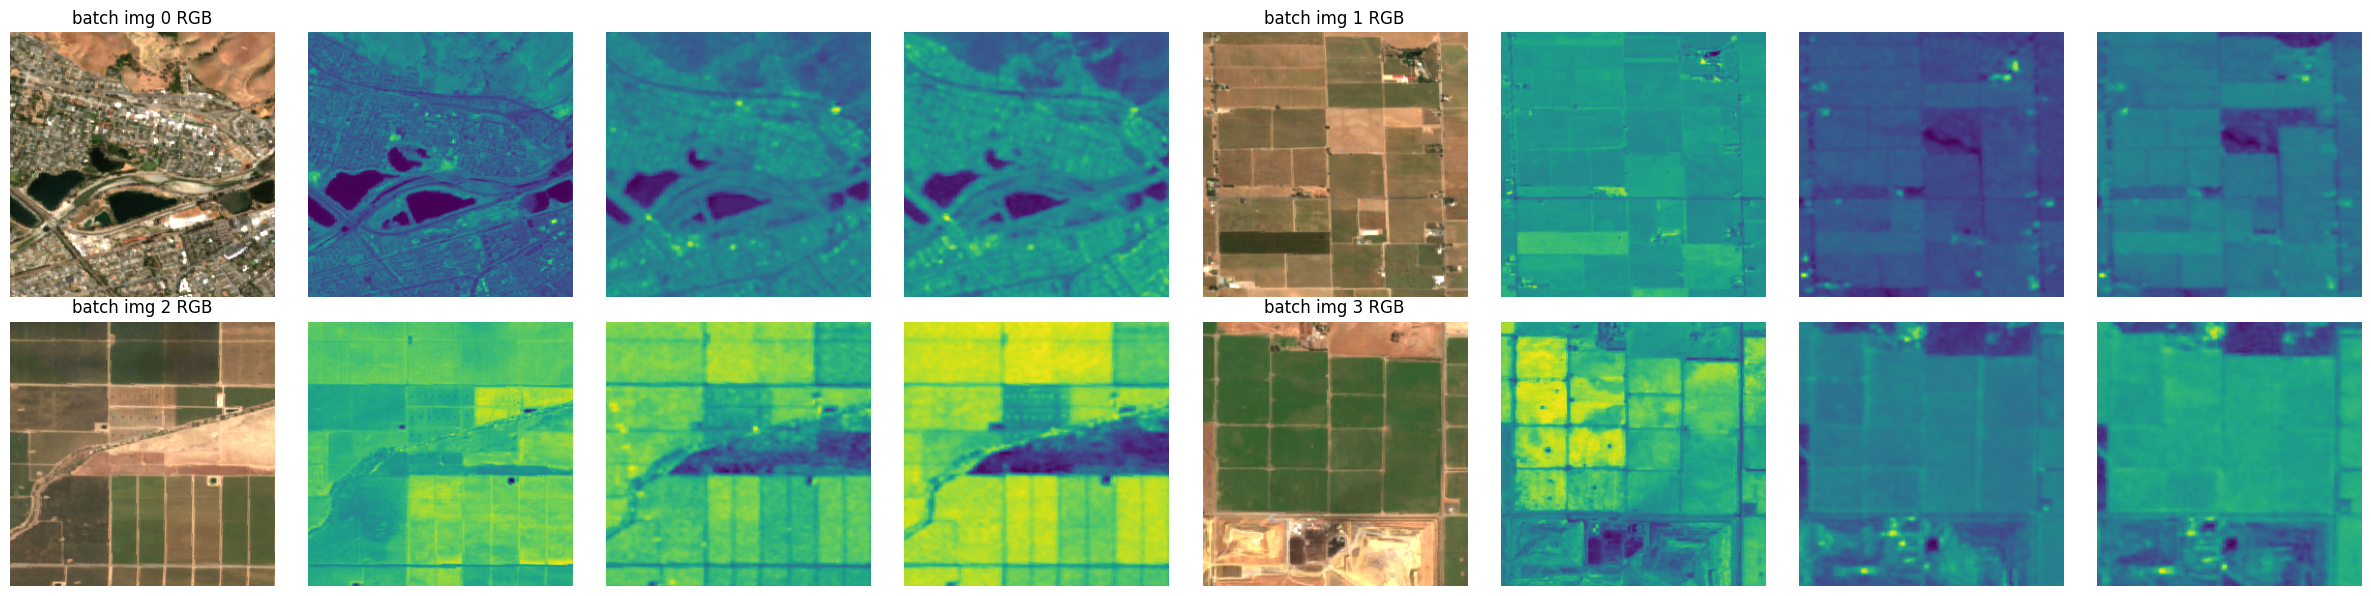

In [122]:
x = batch['chip']
imgs = []
titles = []
for i in range(len(x)):
    xi = x[i]
    print ("\n", f"batch img {i}:  ", batch['str_multilabel'][i])
    for ii in range(4):
        if ii==0:
            ximg = np.transpose(xi[:3], [1,2,0])
            ximg = ximg / 2000
            ximg[ximg>1] = 1
            imgs.append(ximg)
            titles.append(f"batch img {i} RGB")
        else:
            xii = xi[ii+2]
            a,b = np.percentile(xii, [1,99])
            xii = (xii-a)/(b-a)
            imgs.append(xii)
            titles.append("")
            
for ax,i in subplots(len(imgs), n_cols=8):
    plt.imshow(imgs[i])
    plt.axis("off")
    plt.title(titles[i])


 highway=* highway=residential highway=track

 amenity=* amenity=parking building=* building=school highway=* highway=residential highway=track landuse=* landuse=meadow landuse=quarry landuse=residential leisure=* leisure=park leisure=pitch leisure=track sport=* sport=baseball sport=running waterway=* waterway=stream

 highway=* highway=track landuse=* landuse=meadow waterway=* waterway=stream

 building=* building=house highway=* highway=residential highway=track landuse=* landuse=commercial landuse=farmland landuse=grass landuse=meadow landuse=orchard landuse=residential leisure=* leisure=park natural=* natural=water power=* power=generator water=* water=pond waterway=* waterway=stream


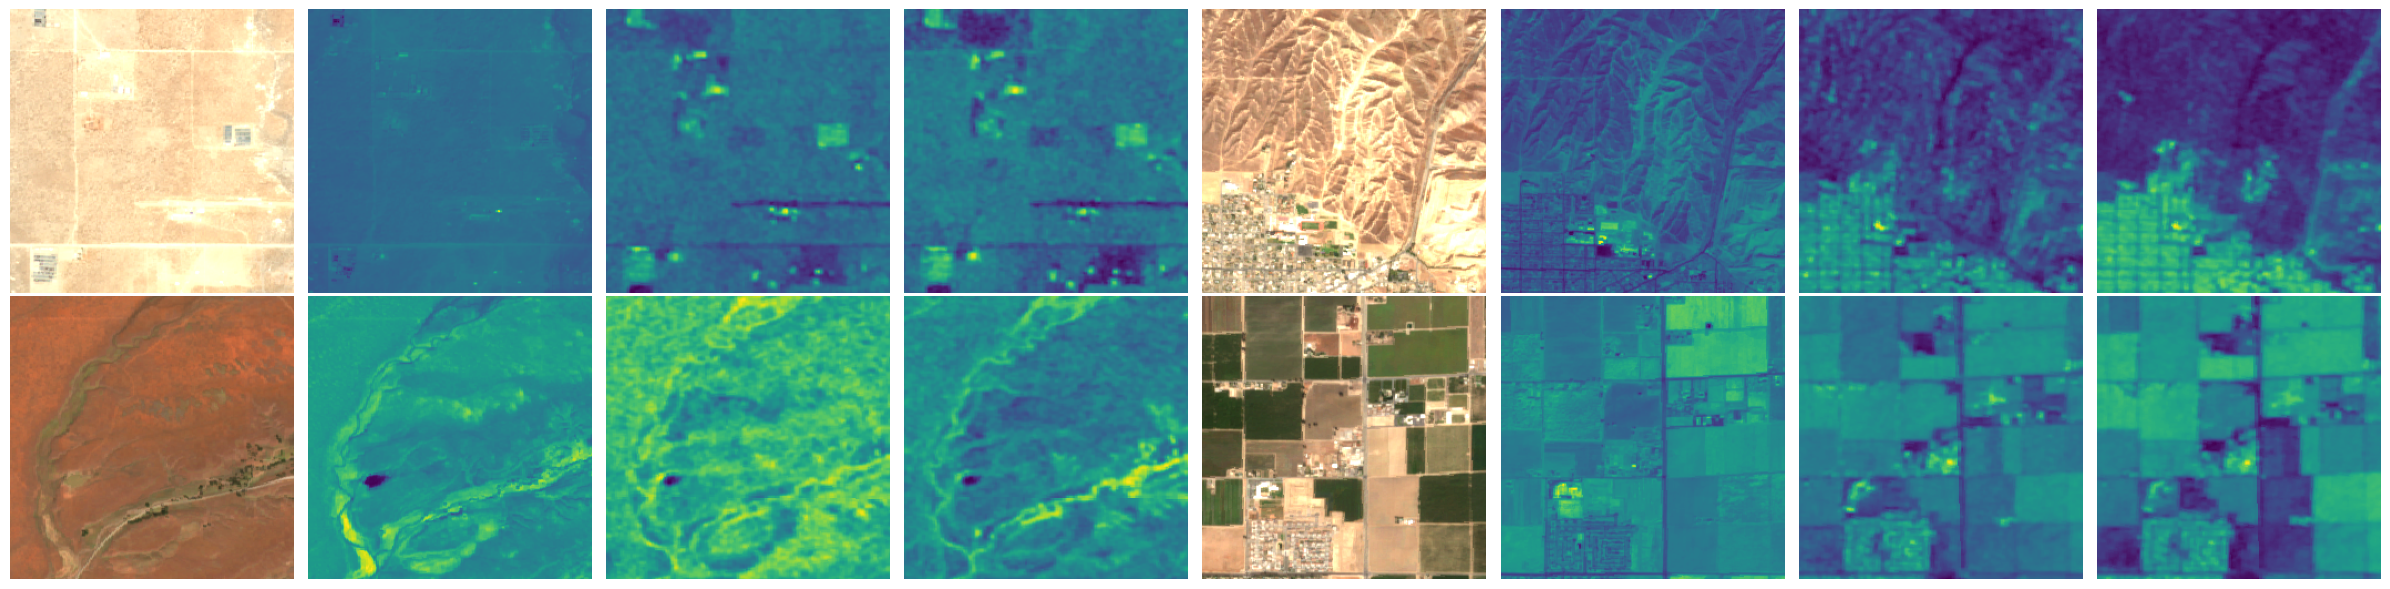

In [91]:
x = batch['chip']
imgs = []

for i in range(len(x)):
    xi = x[i]
    print ("\n", batch['str_multilabel'][i])
    for ii in range(4):
        if ii==0:
            ximg = np.transpose(xi[:3], [1,2,0])
            ximg = ximg / 2000
            ximg[ximg>1] = 1
            imgs.append(ximg)
        else:
            xii = xi[ii+2]
            a,b = np.percentile(xii, [1,99])
            xii = (xii-a)/(b-a)
            imgs.append(xii)
            
for ax,i in subplots(len(imgs), n_cols=8):
    plt.imshow(imgs[i])
    plt.axis("off")